In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:0em;
padding-right:3em;
}
</style>
""")

### Gambler's problem

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of \$100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. Find the optimal policy maximizes the probability of reaching the goal.

This problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler's capital, $s\in\{1,2,3,...,99\}$ and the actions are stakes, $a\in\{1,...,min(s,100-s)\}$. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is $+1$. The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. Let denote $p=4$ the probability of the coin coming up heads.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 


#### Find an action that give maximum expected return

- For an specific action $a$, compute $\Sigma_{s'}[{P_{ss'}^{a} * (R_{ss'}^{a}+\gamma*V(s'))}]$
- Find maximum over actions
- Undiscounted MDP $\to \gamma = 1.0$ 

In [3]:
def find_value_of_best_action(state, Vs, p_h):
    action_max = min(state, 100-state)
    maxValue = -1000
    maxAction = 0
    for action in range(1, action_max + 1):
        Vs[-1] = Vs[0] = 0
        if state+action==100:
            good_r = 1
        else:
            good_r = 0
        value = p_h*min(1.,good_r + Vs[state+action]) + (1.-p_h)*(0. + Vs[state-action]) #+ 1e-7
        
        if value > maxValue:
            maxValue = value
            maxAction = action
    return maxValue, maxAction

In [4]:
def plot_values(Vs):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(Vs, '-b', label='Vs')
    plt.ylabel('Value estimates', fontsize=16)
    plt.xlabel('Capital', fontsize=16)
    plt.show()

In [5]:
def plot_policy(policy):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.step(policy, '-b', label='Vs')
    plt.ylabel('Final policy (stake)', fontsize=16)
    plt.xlabel('Capital', fontsize=16)
    plt.show()

### Solver using Value Iteration

<img src="./index/gambler_vi.png">

- what to maintain in cache and their shapes ?
- what is $\Sigma_{s^{'}} ...$ ?

In [6]:
Vs = np.zeros((101), dtype=np.float32)
policy = np.zeros((101), dtype=np.int)
theta = 1e-10
p_h = 0.4

iters = 0
while True:
    delta = 0
    for state in range(1,100):
        v = Vs[state]
        Vs[state], _ = find_value_of_best_action(state, Vs.copy(), p_h)
        delta = max(delta, abs(v-Vs[state]))
    
    iters += 1
    print '%d\'th iter: error = %.15f' %(iters, delta)
    
    if delta<theta:
        break

1'th iter: error = 0.953343987464905
2'th iter: error = 0.368896007537842
3'th iter: error = 0.139264002442360
4'th iter: error = 0.055705599486828
5'th iter: error = 0.022282239049673
6'th iter: error = 0.008912895806134
7'th iter: error = 0.001638399786316
8'th iter: error = 0.000393216148950
9'th iter: error = 0.000076026655734
10'th iter: error = 0.000030410708860
11'th iter: error = 0.000002641463652
12'th iter: error = 0.000000904547051
13'th iter: error = 0.000000078231096
14'th iter: error = 0.000000029802322
15'th iter: error = 0.000000014901161
16'th iter: error = 0.000000007450581
17'th iter: error = 0.000000000931323
18'th iter: error = 0.000000000000000


- what to maintain in cache and their shapes ?
    - value function, shape = (101,)  $\to$ state 0 and 100 are null state
    - policy, shape = (101,) $\to$ state 0 and 100 are null state
- what is $\Sigma_{s^{'}} ...$ ?
    - p \* (r_right + V(s'_right)) + (1-p) \* (r_wrong + V(s'_wrong))

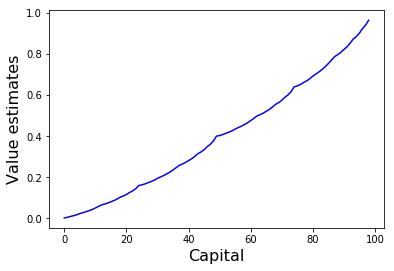

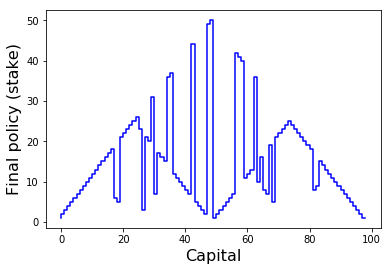

In [7]:
# Vs[0] and Vs[100] are NULL state
# Calculate the final policy

def find_value_of_best_action2(state, Vs, p_h):
    action_max = min(state, 100-state)
    maxValue = -1000
    maxAction = max2Action = 0
    for action in range(1, action_max + 1):
        Vs[-1] = Vs[0] = 0
        if state+action==100:
            good_r = 1
        else:
            good_r = 0
        value = p_h*min(1.,good_r + Vs[state+action]) + (1.-p_h)*(0. + Vs[state-action])
        if value > maxValue:
            maxValue = value
            max2Action = maxAction
            maxAction = action
    return maxValue, maxAction, max2Action

policy2 = policy.copy()
for state in range(1,100):
    _, policy[state], policy2[state] = find_value_of_best_action2(state, Vs, p_h)

plot_values(Vs[1:100])
plot_policy(policy[1:100])

#### Optimal Value Function

<img style="float: left;" src="./index/gambler_optimal_V.png">

#### Optimal Policy

|risky|conservative|
|:---:|:---:|
|<img src="./index/gambler_optimal_policy_risky.png">|<img src="./index/gambler_policy_conservative.png">|


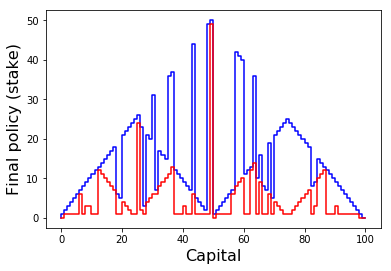

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.step(policy, '-b')
ax1.step(policy2, '-r')
plt.ylabel('Final policy (stake)', fontsize=16)
plt.xlabel('Capital', fontsize=16)
plt.show()

<img style="float: left;" src="./index/gambler_compare_policy.png">

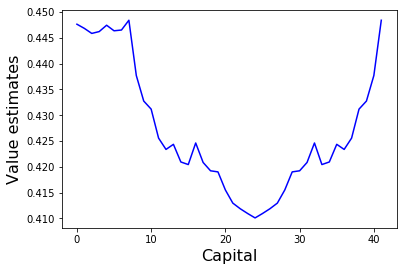

In [9]:
s = 58
Vs_test = Vs.copy()
Vs_test[-1] = 1.

s_to_all_a = np.zeros((100-s+1,))
for action in range(1,100-s+1):
    s_to_all_a[action] = 0.4*Vs_test[s+action] + 0.6*Vs_test[s-action]
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(s_to_all_a[1:], '-b')
plt.ylabel('Value estimates', fontsize=16)
plt.xlabel('Capital', fontsize=16)
plt.show()

<img style="float: left;" src="./index/s_to_all_a.png">